<a href="https://colab.research.google.com/github/SiracencoSerghei/Statistics_and_ML/blob/main/3.0_regression/stats_regression_simpleRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SECTION: Regression
# Simple regression

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

OSError: 'seaborn-colorblind' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

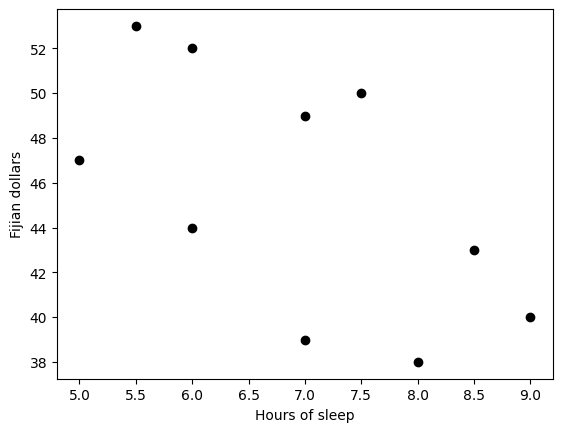

In [3]:
## example: effects of sleep on food spending

sleepHours = [5, 5.5, 6, 6, 7, 7, 7.5, 8, 8.5, 9]
dollars = [47, 53, 52, 44, 39, 49, 50, 38, 43, 40]

# start by showing the data
plt.plot(sleepHours,dollars,'ko',markerfacecolor='k')
plt.xlabel('Hours of sleep')
plt.ylabel('Fijian dollars')
plt.show()

In [4]:
## "manual" regression via least-squares fitting

# create the design matrix
desmat = np.vstack((np.ones(10),sleepHours)).T
print("desmat")
print(desmat)
# compute the beta parameters (regression coefficients)
beta = np.linalg.lstsq(desmat,dollars,rcond=None)[0]
print("beta")
print(beta)
# predicted data values
yHat = desmat@beta  # yHat = np.dot(desmat, beta)

desmat
[[1.  5. ]
 [1.  5.5]
 [1.  6. ]
 [1.  6. ]
 [1.  7. ]
 [1.  7. ]
 [1.  7.5]
 [1.  8. ]
 [1.  8.5]
 [1.  9. ]]
beta
[62.84737679 -2.49602544]


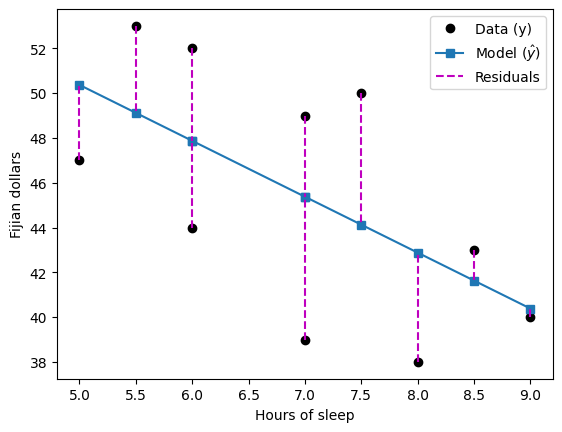

In [5]:
## show the predicted results on top of the "real" data

# show previous data
plt.plot(sleepHours,dollars,'ko',markerfacecolor='k')

# predicted results
plt.plot(sleepHours,yHat,'s-')

# show the residuals
for i in range(10):
    plt.plot([sleepHours[i],sleepHours[i]],[dollars[i], yHat[i]],'m--')


plt.legend(('Data (y)', 'Model ($\\hat{y}$)', 'Residuals'))

plt.xlabel('Hours of sleep')
plt.ylabel('Fijian dollars')
plt.show()

In [6]:
## now with scipy

slope,intercept,r,p,std_err = stats.linregress(sleepHours,dollars)
print(intercept,slope)
print(beta)

62.84737678855326 -2.4960254372019075
[62.84737679 -2.49602544]


---
# Compute R2 and F
---

In [7]:

# Example data
sleepHours = np.array([5, 5.5, 6, 6, 7, 7, 7.5, 8, 8.5, 9])
dollars = np.array([120, 115, 112, 110, 105, 102, 100, 95, 92, 90])

# Create the design matrix
desmat = np.vstack((np.ones(10), sleepHours)).T

# Compute the beta parameters (regression coefficients)
beta = np.linalg.lstsq(desmat, dollars, rcond=None)[0]

# Predicted data values
yHat = desmat @ beta

# Residuals
residuals = dollars - yHat

# Total Sum of Squares (SST)
SST = np.sum((dollars - np.mean(dollars))**2)

# Residual Sum of Squares (SSR)
SSR = np.sum(residuals**2)

# Regression Sum of Squares (SSReg)
SSReg = SST - SSR

# Compute R-squared
R_squared = 1 - (SSR / SST)

# Number of observations and predictors
n = len(dollars)
k = desmat.shape[1] - 1  # number of predictors (subtract intercept)

# Compute F-statistic
F_statistic = (SSReg / k) / (SSR / (n - k - 1))

# Print results
print("R-squared:", R_squared)
print("F-statistic:", F_statistic)


R-squared: 0.9874461083195312
F-statistic: 629.2525909592081


variant 2

beta_coeffs: [62.84737679 -2.49602544]
SSerror: 172.53100158982517
SStotal: 270.5
r2_score: 0.36217744329084967
SSmodel: 97.96899841017627
F-Score: 4.542673374983937


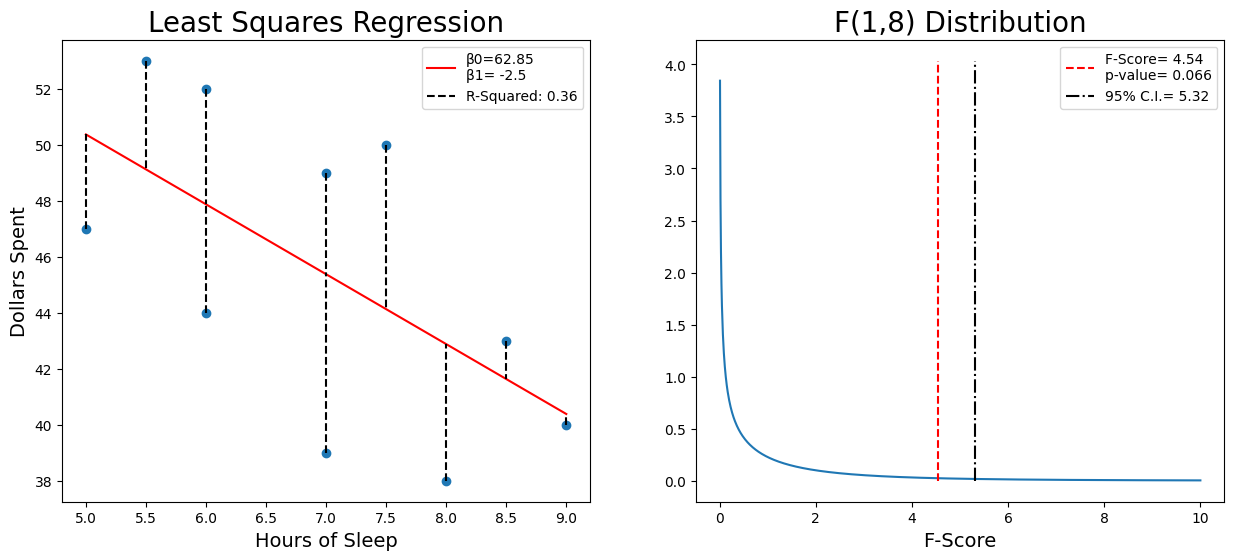

In [22]:
 
 
def manual_r2_f():
    sleep_hours = [5, 5.5, 6, 6, 7, 7, 7.5, 8, 8.5, 9]
    dollars = [47, 53, 52, 44, 39, 49, 50, 38, 43, 40]
    
    design_matrix = np.vstack((np.ones(len(sleep_hours)), sleep_hours)).T
    
    beta_coeffs = np.dot(np.linalg.inv(np.dot(design_matrix.T, design_matrix)), (np.dot(design_matrix.T, dollars)))
    print(f"beta_coeffs: {beta_coeffs}")
 
    y_hat = np.dot(design_matrix, beta_coeffs)
    
    SSerror = np.sum((dollars - y_hat)**2)
    SStotal = np.sum((dollars - np.mean(dollars))**2)
    r2_score = 1 - SSerror / SStotal
    print(f"SSerror: {SSerror}")
    print(f"SStotal: {SStotal}")
    print(f"r2_score: {r2_score}")
    
    SSmodel = np.sum((y_hat - np.mean(dollars))**2)
    print(f"SSmodel: {SSmodel}")
    k = design_matrix.shape[1] # Total number of parameters
    n = len(dollars) # Total number of observations
    f_score_num = SSmodel / (k-1)
    f_score_denom = SSerror / (n-k)
    f_score = f_score_num / f_score_denom
    print(f"F-Score: {f_score}")
 
    p_value = 1 - stats.f.cdf(abs(f_score), dfn=k-1, dfd=n-k)
    
    fig, ax = plt.subplots(1,2,figsize=(15,6))
    ax[0].scatter(sleep_hours, dollars )
    ax[0].plot(sleep_hours, y_hat, color='red', 
               label=f"β0={np.round(beta_coeffs[0], 2)}\nβ1= {np.round(beta_coeffs[1], 2)}")
    
    for i in range(len(sleep_hours)):
        ax[0].plot([sleep_hours[i],sleep_hours[i]], [dollars[i],y_hat[i]], linestyle='--', color='k', label=f"R-Squared: {np.round(r2_score, 2)}" if i == 0 else None)
    ax[0].set_title('Least Squares Regression', fontsize=20)
    ax[0].set_xlabel('Hours of Sleep', fontsize=14)
    ax[0].set_ylabel('Dollars Spent', fontsize=14)
    ax[0].legend()
    
    x = np.linspace(0,10,1000)
    y = stats.f.pdf(x, dfn=k-1, dfd=n-k)
    sig_95 = stats.f.ppf(0.95, dfn=k-1, dfd=n-k)
    
    ax[1].plot(x, y, label=f"")
    ax_ylim = [0, ax[1].get_ylim()[1]]
    ax[1].plot([f_score,f_score], ax_ylim, linestyle='--', color='red', label=f"F-Score= {np.round(f_score, 2)}\np-value= {np.round(p_value, 3)}")
    ax[1].plot([sig_95,sig_95], ax_ylim, linestyle='-.', color='k', label=f"95% C.I.= {np.round(sig_95, 2)}")
    ax[1].set_title(f"F({k-1},{n-k}) Distribution", fontsize=20)
    ax[1].set_xlabel('F-Score', fontsize=14)
    ax[1].legend()
    plt.show()
 
manual_r2_f()